# Mall Customer Segmentation

In [1]:
# Importing Required libraries
import io
import os
import pandas as pd # I/O files
import numpy as np # linear algebra
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat"

D:\Imarticus\stat


In [3]:
malldata=pd.read_csv('Mall_Customers.csv') # importing the file

In [4]:
# The shape method provides a dimension of the DataFrame
malldata.shape

(200, 5)

In [5]:
malldata.head()
# head() is used to display the first few rows of a DataFrame or a Series. It helps you get a quick overview of the data.

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
malldata.tail()
# tail() method is similar to head(), but it displays the last few rows of a DataFrame or a Series.

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
malldata.dtypes
# The dtypes attribute of a DataFrame provides information about the data types of each column.

CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [8]:
# The info() method provides a concise summary of a DataFrame, including information about the data types, 
# non-null values, and memory usage.
malldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
malldata.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [10]:
malldata=pd.get_dummies(malldata,columns=['Gender'])

In [11]:
# The describe() method provides a summary of the central tendency, dispersion, and shape of the distribution of the data.
malldata.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000


In [12]:
# removing unwanted columns from the dataframe
malldata=malldata.drop('CustomerID',axis=1)

In [13]:
malldata.head()

,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


# Model Building

In [14]:
# importing KMeans Clustering from sklearn
from sklearn.cluster import KMeans

In [15]:
#creating a list of WCSS(within cluster sum square distance) to know the k value using elbow plot
wcss_list=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)# n_init='auto',random_state=42
    kmeans.fit(malldata)
    wcss_list.append(kmeans.inertia_)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

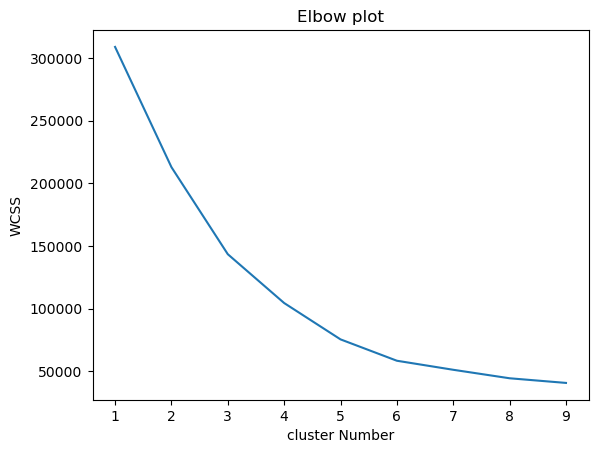

In [16]:
# Finding optimal K value using Elbow plot
plt.plot(range(1,10),wcss_list)
plt.title("Elbow plot")
plt.xlabel("cluster Number")
plt.ylabel("WCSS")
plt.show()

In [17]:
# importing silhouette_score from sklearn
from sklearn.metrics import silhouette_score

In [18]:
clust3model=KMeans(n_clusters=3)

In [19]:
clust3model=clust3model.fit(malldata)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
silhouette_score(malldata,clust3model.labels_)

0.38366377184202277

In [21]:
pd.DataFrame(clust3model.labels_).value_counts()

0    123
1     39
2     38
dtype: int64

In [22]:
malldata.columns

Index(['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

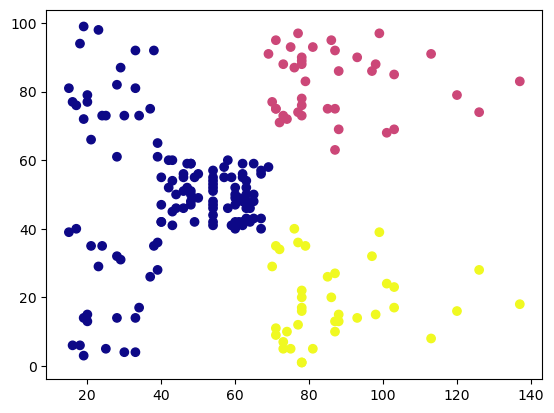

In [23]:
plt.scatter(malldata['Annual_Income_(k$)'],malldata['Spending_Score'],c=clust3model.labels_,cmap='plasma')

In [24]:
clust3model.cluster_centers_

array([[40.32520325, 44.15447154, 49.82926829,  0.59349593,  0.40650407],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579]])

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
h_clust=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')# affinity= or metric=

In [27]:
h_clust_model=h_clust.fit(malldata)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
h_clust_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [29]:
pd.DataFrame(h_clust_model.labels_).value_counts()

0    83
2    39
1    35
4    23
3    20
dtype: int64

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances

In [31]:
X_euclidean=euclidean_distances(malldata)

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_11256\1250956134.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendogram=sch.dendrogram(sch.linkage(X_euclidean,method='ward'))


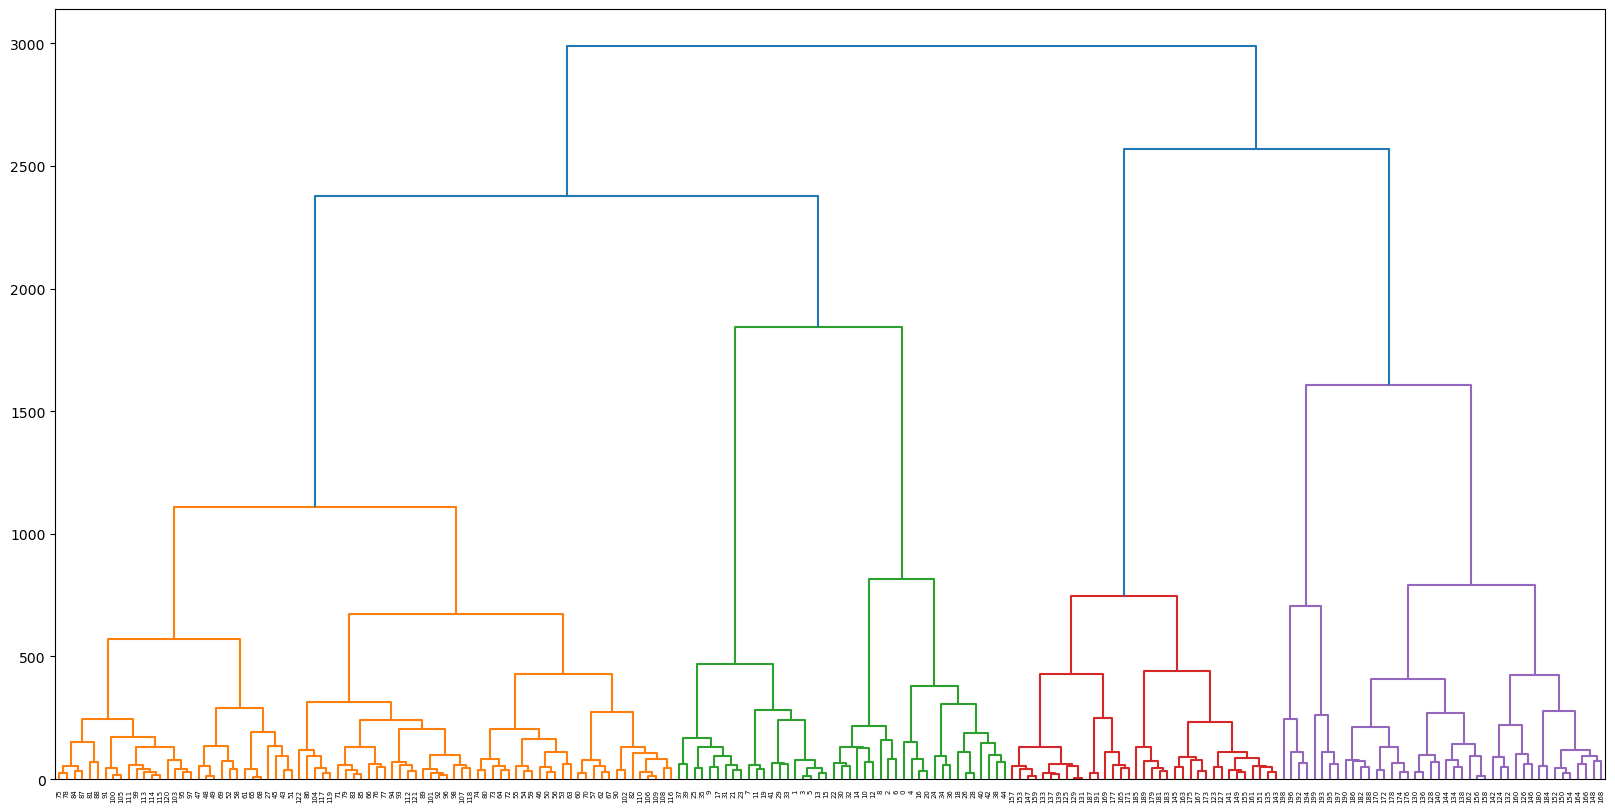

In [32]:
plt.figure(figsize=(20,10))
dendogram=sch.dendrogram(sch.linkage(X_euclidean,method='ward'))

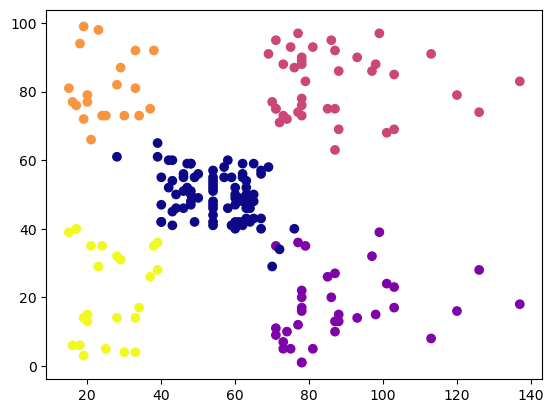

In [33]:
plt.scatter(malldata['Annual_Income_(k$)'],malldata['Spending_Score'],c=h_clust_model.labels_,cmap='plasma')

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
nei=NearestNeighbors(n_neighbors=5)

In [36]:
nbrs=nei.fit(malldata)

In [37]:
distances,indices=nbrs.kneighbors(malldata)

In [38]:
distances=np.sort(distances[:,1])

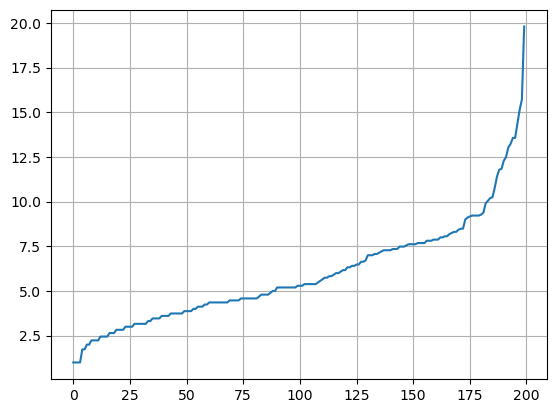

In [39]:
plt.plot(distances)
plt.grid()

In [40]:
# Eplison- 14 - point at which distance is stagnating
# minpoints-5

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
dbs=DBSCAN(eps=14,min_samples=5).fit(malldata)

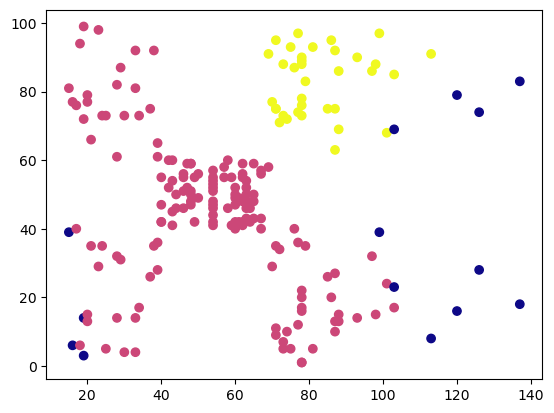

In [43]:
plt.scatter(malldata['Annual_Income_(k$)'],malldata['Spending_Score'],c=dbs.labels_,cmap='plasma')